In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import numpy as np
from os import listdir
from os.path import isfile, join
import pickle as pkl
sys.path.append("../DetResponse/")
sys.path.append("../Utils/")
sys.path.append("../PDFs/")
from kde.pykde import gaussian_kde
from sklearn.neighbors import KernelDensity

from Detector import *
from Plot_Histogram import *
from Signal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

# Binning:
mass = 1000
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = np.array([E - Ewidth/2. for E in Etrue_center])
Etrue_edges = np.append(Etrue_edges, Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

In [7]:
# Grouping true energy:
nutype = 'nu_mu'
pid = 2
path = './PreComp/EtrueSplitted/testbw/'
# path = './PreComp/EtrueSplitted/'

In [8]:


Etrue = np.array([])
for i in range(0, 99, 2):
    firstE = i
    lastE = i+1
    # file = '{}RespMatrix_kde_bwadaptive_{}_pid{}_Ebin_{}_{}_weightbwFalse.pkl'.format(path, nutype, pid, firstE, lastE)
    file = '{}RespMatrix_kde_bwadaptive_{}_pid{}_Ebin_{}_{}_noweight.pkl'.format(path, nutype, pid, firstE, lastE)

    if not isfile(file):
        print("missing: {}".format(file))
        continue
    pkldict = pkl.load(open(file, "rb"))
    Resp = pkldict['Resp'][pid][nutype]
    Etrue = np.append(Etrue, pkldict['Bin']['true_energy_center'])
    if i==0:
        Reso = Resp 
    else:
        Reso = np.concatenate((Reso, Resp), axis=1)

In [18]:
# properly normalize the rersolution:
nonnumber = np.array([])
Reso_norm = np.zeros(Reso.shape)
for iE in range(0, 100):
    for ipsi in range(0, 50):
        temp = Reso[ipsi, iE, 0:18, 0:50]
        if np.sum(temp) == 0: 
            print("warning")
            print("iE {}, ipsi {}".format(iE, ipsi))
            continue
        # testsum = 0
        for jE in range(0, 50):
            for jpsi in range(0, 18):
                Reso_norm[ipsi, iE, jpsi, jE] = Reso[ipsi, iE, jpsi, jE]/np.sum(temp)
        #         testsum += Reso[ipsi, iE, jpsi, jE]
        # print(testsum)        

warning
iE 0, ipsi 0


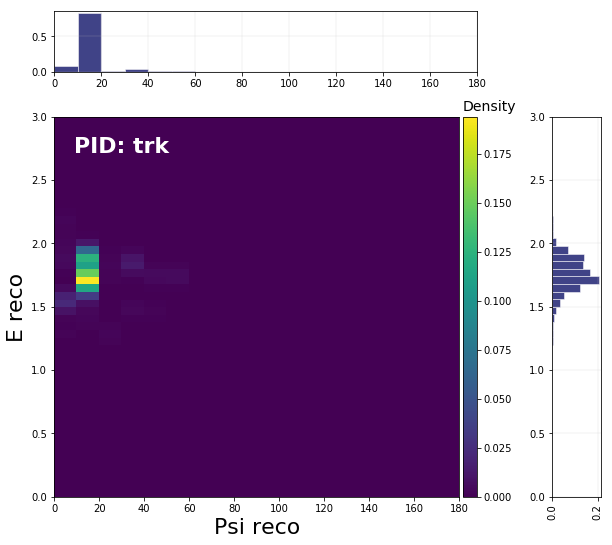

1.0

In [20]:
plot_projections(Reso_norm[2, 10, 0:18, 0:50], np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi reco", "E reco", "PID: trk")
np.sum(Reso_norm[25, 25, 0:18, 0:50])

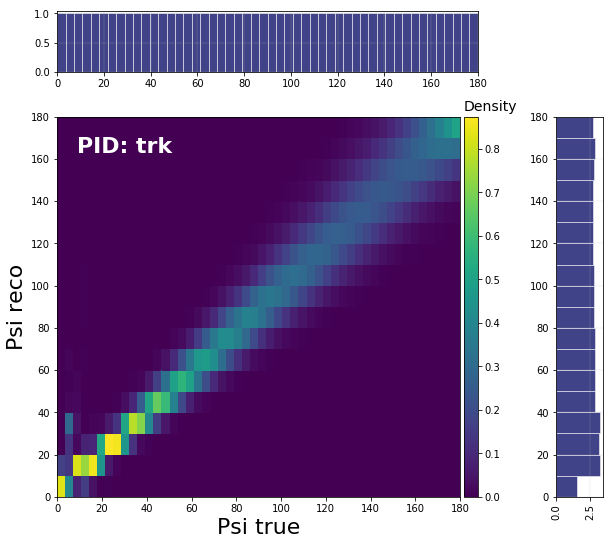

In [7]:

psi_kde = np.zeros((50, 18))
ietrue = 10
for j in range(0, 50):
    psi_kde += Reso_norm[0:50, ietrue, 0:18, j]
plot_projections(psi_kde, np.array([Psitrue_edges, Psireco_edges]), "Psi true", "Psi reco", "PID: trk")


In [10]:
# Building binned Resolution:
MCdict = ExtractMC(['140000'])
# track
# loc = np.where((MCdict['PID']>=0.85) & (MCdict['nutype']>0.))
loc = np.where((MCdict['nutype']>0.))

psitrue = MCdict["psi_true"][loc]
Etrue = MCdict["E_true"][loc]
psireco = MCdict["psi_reco"][loc]
Ereco = MCdict["E_reco"][loc]
weight = MCdict["w"][loc]


In [22]:
Resobin = np.histogramdd((psitrue, Etrue, psireco, Ereco),
                                           bins = (Psitrue_edges, Etrue_edges, Psireco_edges, Ereco_edges))

In [23]:
# properly normalize the rersolution:
nonnumber = np.array([])
Resobin_norm = np.zeros(Resobin[0].shape)
for iE in range(0, 100):
    for ipsi in range(0, 50):
        temp = Resobin[0][ipsi, iE, 0:18, 0:50]
        if np.sum(temp) == 0: 
            print("warning")
            print("iE {}, ipsi {}".format(iE, ipsi))
            continue
        # testsum = 0
        for jE in range(0, 50):
            for jpsi in range(0, 18):
                Resobin_norm[ipsi, iE, jpsi, jE] = Resobin[0][ipsi, iE, jpsi, jE]/np.sum(temp)


warning
iE 0, ipsi 0
warning
iE 0, ipsi 4
warning
iE 0, ipsi 5
warning
iE 0, ipsi 49
warning
iE 14, ipsi 0
warning
iE 21, ipsi 0
warning
iE 22, ipsi 0
warning
iE 24, ipsi 0
warning
iE 26, ipsi 1
warning
iE 28, ipsi 0
warning
iE 29, ipsi 0
warning
iE 29, ipsi 49
warning
iE 30, ipsi 1
warning
iE 32, ipsi 0
warning
iE 33, ipsi 0
warning
iE 33, ipsi 49
warning
iE 34, ipsi 0
warning
iE 34, ipsi 49
warning
iE 35, ipsi 0
warning
iE 35, ipsi 1
warning
iE 35, ipsi 48
warning
iE 35, ipsi 49
warning
iE 36, ipsi 0
warning
iE 36, ipsi 49
warning
iE 37, ipsi 0
warning
iE 37, ipsi 49
warning
iE 38, ipsi 0
warning
iE 38, ipsi 1
warning
iE 38, ipsi 2
warning
iE 38, ipsi 49
warning
iE 39, ipsi 1
warning
iE 39, ipsi 4
warning
iE 40, ipsi 49
warning
iE 41, ipsi 0
warning
iE 41, ipsi 1
warning
iE 41, ipsi 2
warning
iE 41, ipsi 47
warning
iE 42, ipsi 0
warning
iE 42, ipsi 1
warning
iE 42, ipsi 4
warning
iE 42, ipsi 48
warning
iE 43, ipsi 0
warning
iE 43, ipsi 1
warning
iE 43, ipsi 6
warning
iE 43, ipsi 48
w

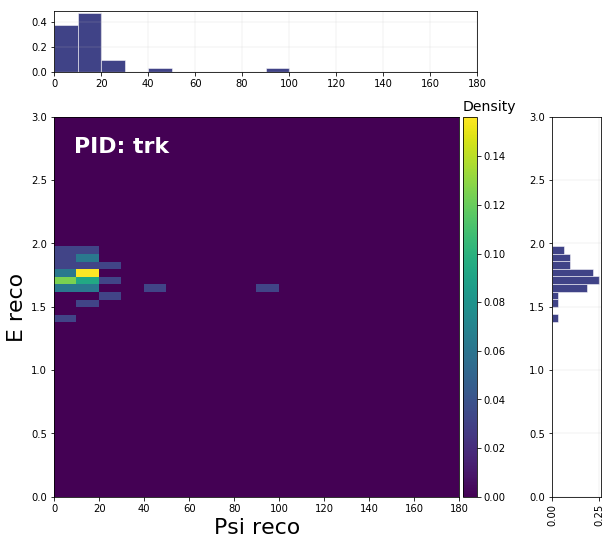

1.0

In [25]:
plot_projections(Resobin_norm[2, 10, 0:18, 0:50], np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi reco", "E reco", "PID: trk")
np.sum(Resobin_norm[25, 25, 0:18, 0:50])

In [1]:
psi_kde = np.zeros((50, 18))
ietrue = 10
for j in range(0, 50):
    psi_kde += Resobin_norm[0:50, ietrue, 0:18, j]
plot_projections(psi_kde, np.array([Psitrue_edges, Psireco_edges]), "Psi true", "Psi reco", "PID: trk")

NameError: name 'np' is not defined

In [11]:
# Effective area:
Eff, xedges, yedges = np.histogram2d(psitrue, Etrue, bins=(Psitrue_edges, Etrue_edges), weights=weight)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


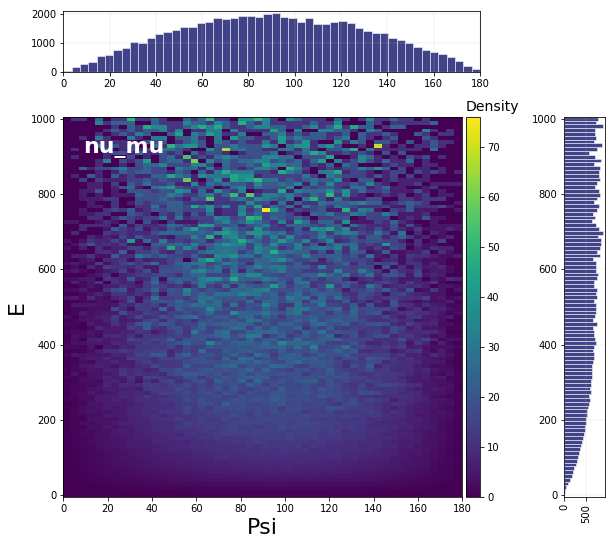

In [13]:
plot_projections(Eff, np.array([Psitrue_edges, Etrue_edges]), "Psi", "E", "nu_mu")


In [29]:
channel = 'bb'
mass = 1000
# Extract precompute spectra
pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_Charon_atEarth_nocut.pkl"

# Precomputed Jfactor:
pathJfactor="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/JFactor_NFW.pkl"
# True spectra:
Jfactor = Interpolate_Jfactor(pathJfactor, Psitrue_center)
# Spectra:
Spectra = Interpolate_Spectra(pathSpectra, Etrue_center, channel, mass)


# Compute the rate as Spectra x Jfactor
Rate = TrueRate(Spectra, Jfactor)
Rate['nu_mu'].shape

(50, 100)

In [30]:
Rateeff = Rate['nu_mu']* Eff

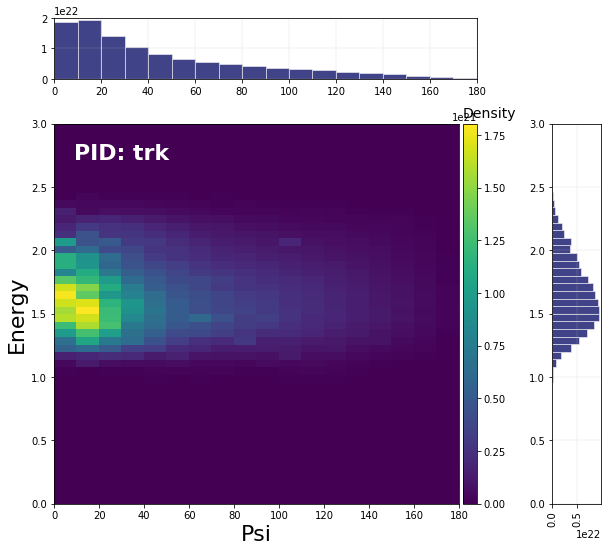

In [31]:
RecoRate = np.tensordot(Resobin_norm, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")


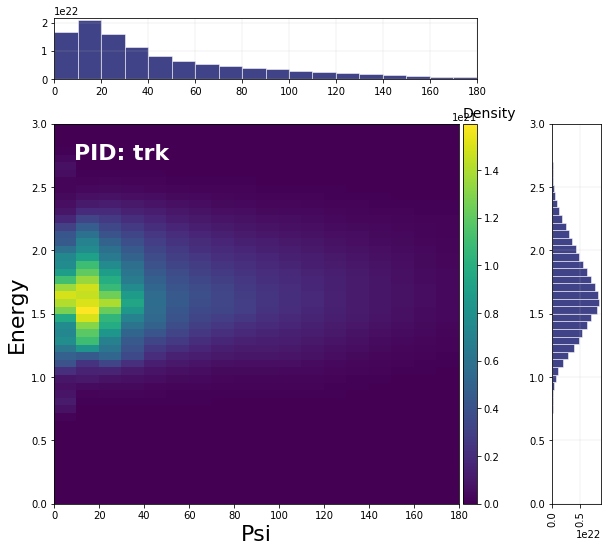

In [17]:
RecoRate = np.tensordot(Reso_norm, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

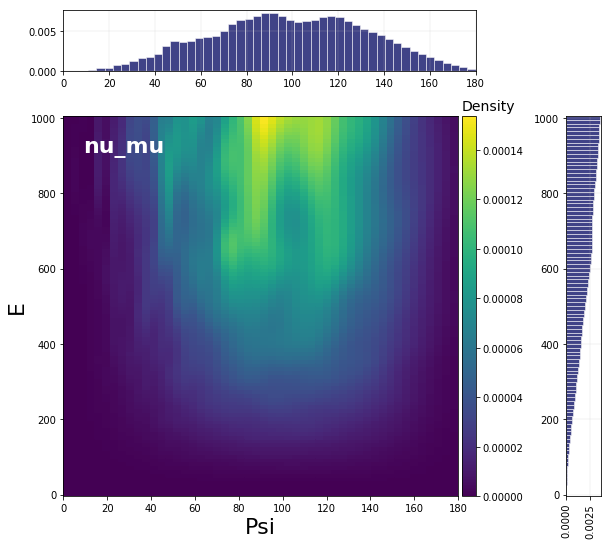

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


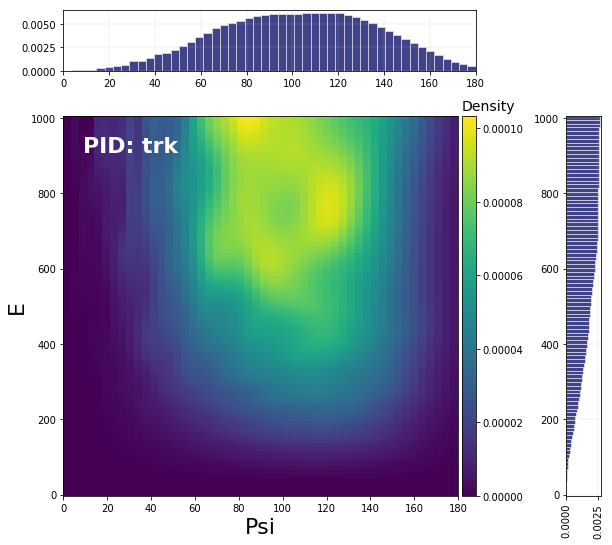

In [15]:
# Aeffkde = pkl.load(open("./PreComp/EtrueSplitted/eff/EffArea_kde_bwscott_nu_mu_nopid_Etrue_0_99.pkl", "rb"))
Aeffkde = pkl.load(open("./PreComp/EtrueSplitted/eff/EffArea_kde_bwadaptive_nu_mu_nopid_Etrue_0_99_weightbw_logEpsi.pkl","rb")) 
Aeffkde1 = pkl.load(open("./temp_Aeff_numu_trk.pkl","rb")) 

psi_edges = np.array(Aeffkde['Bin']['true_psi_edges'])
energy_edges = np.array(Aeffkde['Bin']['true_energy_edges'])

plot_projections(Aeffkde['Eff'], (psi_edges, energy_edges), "Psi", "E", "nu_mu")
plot_projections(Aeffkde1, np.array([Psitrue_edges, Etrue_edges]), "Psi", "E", "PID: trk")



In [13]:
Aeffkde['Bin'].keys()

dict_keys(['true_energy_edges', 'true_psi_edges', 'true_energy_center', 'true_psi_center', 'reco_energy_edges', 'reco_psi_edges', 'reco_energy_center', 'reco_psi_center', 'PID_edges', 'PID_center'])

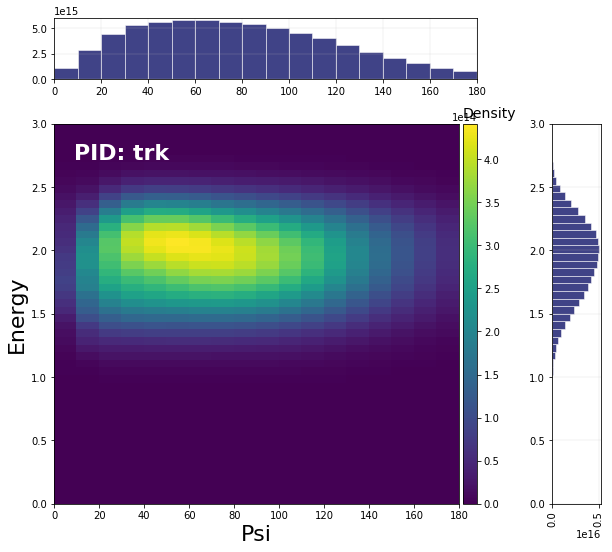

In [48]:
Rateeff = Aeffkde1 * Rate['nu_mu']
RecoRate = np.tensordot(Reso_norm, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

In [19]:
def kde_icecube(x, x_grid, bandwidth=0.03, **kwargs):
    """Kernel Density Estimation with icecube package"""

    if bandwidth == "adaptive":
        adaptive = True
        weight_adaptive_bw = False
        alpha = 0.3
        kde = gaussian_kde(x, **kwargs,adaptive=adaptive,
                                    weight_adaptive_bw=weight_adaptive_bw,alpha=alpha)
    else:
        kde = gaussian_kde(x, **kwargs)
        # for scipy: scale to try to match sklearn in case of scalar
        # Note that scipy weights its bandwidth by the covariance of the
        # input data.  To make the results comparable to the other methods,
        # divide the bandwidth by the sample standard deviation here.
        # https://stackoverflow.com/questions/21000140/relation-between-2d-kde-bandwidth-in-sklearn-vs-bandwidth-in-scipy
        # if (isinstance(bandwidth, str)==False): 
        #     bandwidth = bandwidth / x.std(ddof = 1)

        kde.set_bandwidth(bandwidth)
    return kde.evaluate(x_grid)

def kde_sklearn(x, x_grid, bandwidth=0.03, weight=0, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x, sample_weight=weight)
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid)
    return np.exp(log_pdf)
    # return kde_skl    


In [21]:

def kde_effarea(MCdict, Bin, nu_type="nu_e", pid=0):

    pdg_encoding = {"nu_e":12, "nu_mu":14, "nu_tau":16, "nu_e_bar":-12, "nu_mu_bar":-14, "nu_tau_bar":-16}
    PID = [[0.,0.5],[0.5, 0.85],[0.85, 1]]

    loc = np.where(  (MCdict["nutype"]==pdg_encoding[nu_type]) & (MCdict["PID"]>=PID[pid][0])
                    & (MCdict["PID"]<PID[pid][1]) )
    psitrue = MCdict["psi_true"][loc]
    Etrue = MCdict["E_true"][loc]
    weight = MCdict["w"][loc]

    psiE_train = np.vstack([np.log(psitrue), np.log(Etrue)])
    trueEeval = Bin["true_energy_center"]
    truePsieval = Bin["true_psi_center"]

    g_psi_true, g_energy_true = np.meshgrid(truePsieval, trueEeval)                      
    psi_eval_true = g_psi_true.T.flatten()
    E_eval_true = g_energy_true.T.flatten()


    ##Evaluate the KDE in log(Psi)-log10E
    psiE_eval = np.vstack([np.log(psi_eval_true), np.log(E_eval_true)])
    kde_w = kde_icecube(psiE_train, psiE_eval, bandwidth='scott', weights=weight)
    # #Needs to be divided by evaluation angle
    kde_weight = kde_w/(psi_eval_true* E_eval_true)

    # kde_w = kde_sklearn(psiE_train.T, psiE_eval.T, bandwidth=0.03, weight=weight)
    #Needs to be divided by evaluation angle
    # kde_weight = kde_w.reshape(psi_eval_true.shape)/(psi_eval_true* E_eval_true)


    Psitrue_edges = Bin["true_psi_edges"]
    Etrue_edges = Bin["true_energy_edges"]

    Aeff = np.histogram2d(psi_eval_true, E_eval_true,
                            bins = (Psitrue_edges, Etrue_edges),
                            weights=kde_weight)

    return Aeff[0]


In [22]:
mass = 1000
NE = 100
Npsi = 50
# E true
Etrue_center = np.linspace(1., mass, NE)
Ewidth = (mass-1.)/(NE-1.)
Etrue_edges = np.array([E - Ewidth/2. for E in Etrue_center])
Etrue_edges = np.append(Etrue_edges, Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, Npsi+1)
Psiwidth = 180./(Npsi*1.)
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])

BinEff = dict()
BinEff['true_energy_center'] = Etrue_center
BinEff['true_psi_center'] = Psitrue_center
BinEff['true_energy_edges'] = Etrue_edges
BinEff['true_psi_edges'] = Psitrue_edges



In [23]:
Eff_scott = kde_effarea(MCdict, BinEff, nu_type='nu_mu', pid=2)

In [29]:
Eff_test = kde_effarea(MCdict, BinEff, nu_type='nu_mu', pid=2)

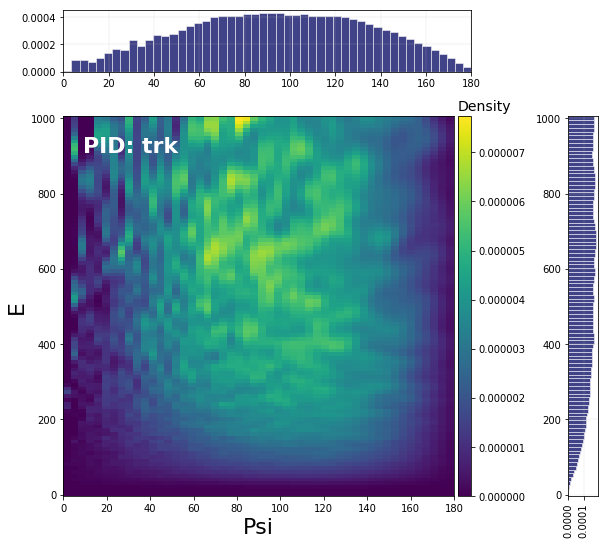

In [30]:
plot_projections(Eff_test, np.array([Psitrue_edges, Etrue_edges]), "Psi", "E", "PID: trk")


In [8]:
Rateeff = Eff_test * Rate['nu_mu']
RecoRate = np.tensordot(Reso_norm, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

NameError: name 'Eff_test' is not defined

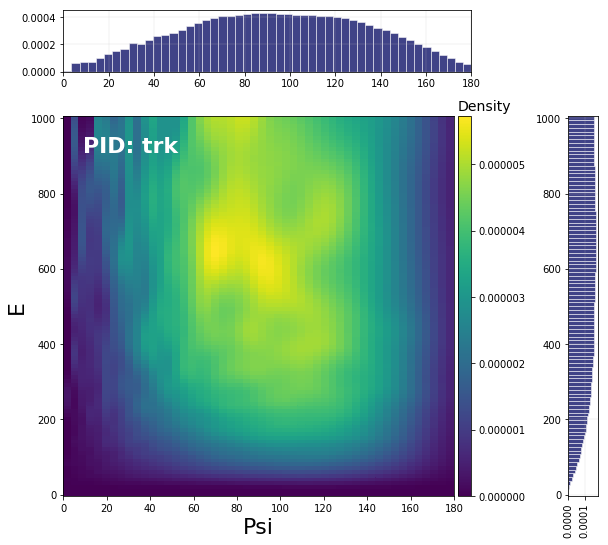

In [24]:
plot_projections(Eff_scott, np.array([Psitrue_edges, Etrue_edges]), "Psi", "E", "PID: trk")


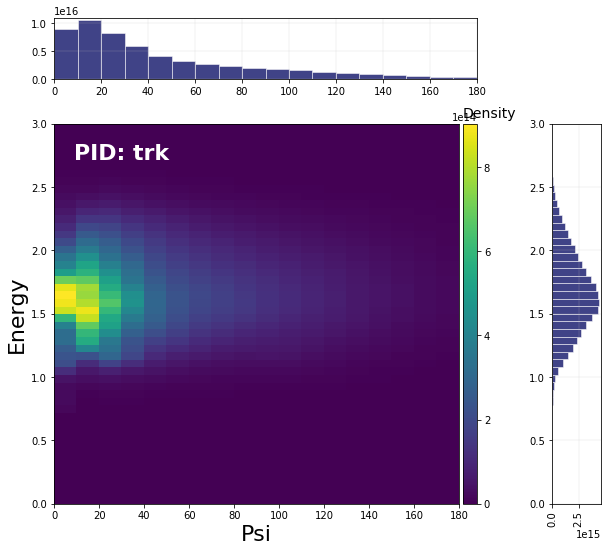

In [25]:
Rateeff = Eff_scott * Rate['nu_mu']
RecoRate = np.tensordot(Reso_norm, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

For 800 GeV mass and other channel



In [11]:
channel = 'nunu'
# channel = 'numunumu'

mass = 200
# Binning:
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = np.array([E - Ewidth/2. for E in Etrue_center])
Etrue_edges = np.append(Etrue_edges, Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin_eval = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

In [12]:

# Extract precompute spectra
pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_Charon_atEarth_nocut.pkl"

# pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_PPPC4_atEarth.pkl"


# Precomputed Jfactor:
pathJfactor="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/JFactor_NFW.pkl"
# True spectra:
Jfactor = Interpolate_Jfactor(pathJfactor, Psitrue_center)
# Spectra:
Spectra = Interpolate_Spectra(pathSpectra, Etrue_center, channel, mass)


# Compute the rate as Spectra x Jfactor
Rate = TrueRate(Spectra, Jfactor)
Rate['nu_mu'].shape

(50, 100)

In [13]:
# Interpolate
Eff_scott = pkl.load((open("./temp_eff_scott.pkl", "rb")))
Reso_int = InterpolateResponseMatrix(Reso_norm, Bin, Bin_eval)
Eff_int = RegularGrid_2D((Bin["true_psi_center"], Bin["true_energy_center"]), Eff_scott, (Bin_eval["true_psi_center"], Bin_eval["true_energy_center"]))



NameError: name 'Reso_norm' is not defined

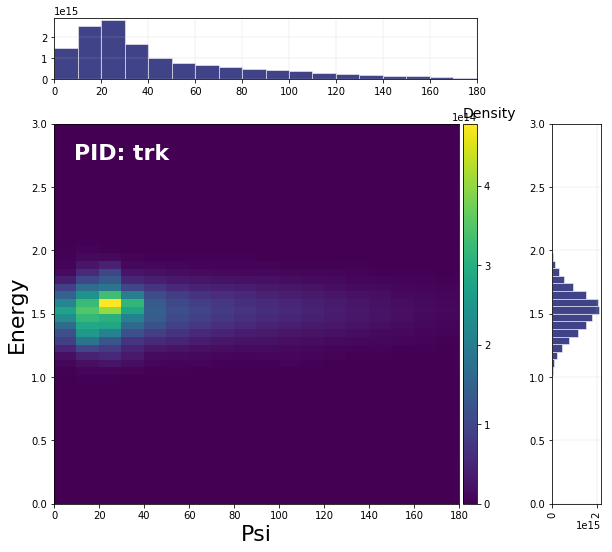

In [43]:
Rateeff = Eff_int * Rate['nu_mu']
RecoRate = np.tensordot(Reso_int, Rateeff, axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

In [44]:
Resobin = np.histogramdd((psitrue, Etrue, psireco, Ereco),
                                           bins = (Psitrue_edges, Etrue_edges, Psireco_edges, Ereco_edges), weights=weight)

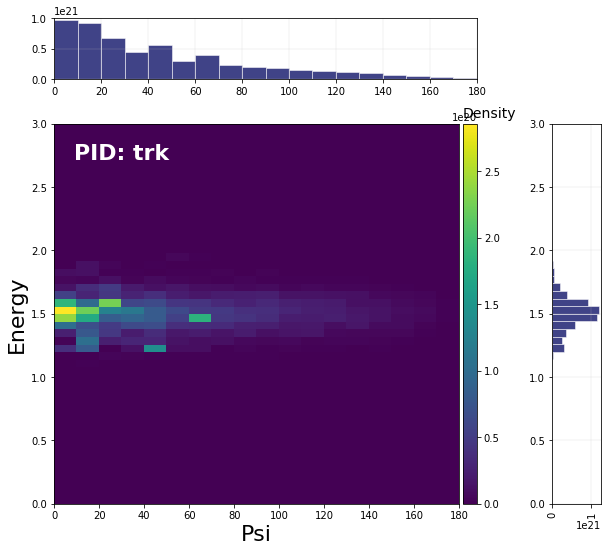

In [45]:
RecoRate = np.tensordot(Resobin[0], Rate['nu_mu'], axes=([0,1], [0,1]))
plot_projections(RecoRate, np.array([Psireco_edges, np.log10(Ereco_edges)]), "Psi", "Energy", "PID: trk")

In [3]:
Eff = pkl.load(open("./PreComp/EtrueSplitted/eff/EffArea_kde_bwadaptive_nu_mu_pid2_weightbw.pkl", "rb"))


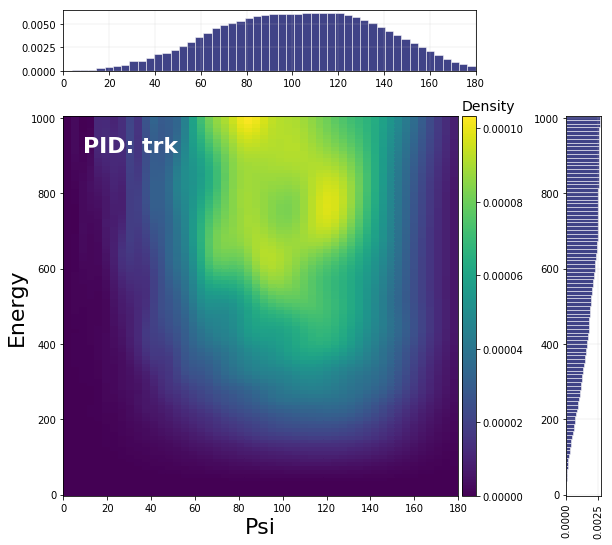

In [7]:
truepsi = np.array(Eff['Bin']['true_psi_edges'])
trueE = np.array(Eff['Bin']['true_energy_edges'])
plot_projections(Eff['Eff'], (truepsi, trueE), "Psi", "Energy", "PID: trk")